## Demo for learning field dependent aberration from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
#tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7000)])

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='insitu_FD',channeltype='1ch',sysfile='Ast_Li')
#L.param = io.param.load('../config/config_zernike_FD.yaml').Params

##### Edit user defined parameters

In [14]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\insitu data\from Yiming\FD_npc/'
L.param.savename = L.param.datapath + 'psfmodel8'
L.param.keyword = 'NUP' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.peak_height = 0.3
L.param.roi.roi_size = [21,21]
L.param.batch_size = 2000
L.param.option.model.const_pupilmag = True
L.param.option.model.symmetric_mag = False
L.param.option.insitu.stage_pos = 0.5
L.param.option.insitu.var_stagepos = True
L.param.loss_weight.smooth = 0.03
L.param.iteration=150
L.param.insitu.min_photon = 0.2
L.param.option.model.var_blur = False
L.param.option.model.blur_sigma = 0.55

##### Start learning

In [15]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:\EMBL files\data for PSF learning\insitu data\from Yiming\FD_npc\NUP96_SNP647_astigmatism_3D_1608_10ms_hama_mm_1800mW_3_MMStack_Default.ome.tif
(800, 1608, 1608)
rois shape channel : (41270, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.69s/it total time: 1.62s
5/6: localization: 4/4 [00:01s]  3.25it/s total time: 2.85s
3/6: learning: 162/200 [12:52s]  4.77s/it, current loss: 0.28897, total time: 772.72s


outlier percentage: 0.2539651649314002
rois shape channel : (7667, 21, 21)


3/6: learning: 159/200 [08:28s]  3.20s/it, current loss: 0.28395, total time: 1280.87s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.53s/it total time: 1.52s
5/6: localization: 4/4 [00:00s] 12.03it/s total time: 1.85s
6/6: saving results: [00:03s] total time: 5.39s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.64s/it total time: 1.59s
5/6: localization: 4/4 [00:01s]  3.71it/s total time: 2.67s
3/6: learning: 156/200 [10:23s]  4.00s/it, current loss: 0.29307, total time: 623.57s


outlier percentage: 0.24919058925102522
rois shape channel : (6957, 21, 21)


3/6: learning: 157/200 [08:07s]  3.11s/it, current loss: 0.28422, total time: 1111.08s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.53s/it total time: 1.52s
5/6: localization: 4/4 [00:00s] 10.76it/s total time: 1.90s
6/6: saving results: [00:03s] total time: 5.28s


##### Show results

In [16]:
f,p = io.h5.load(resfile) # load result file

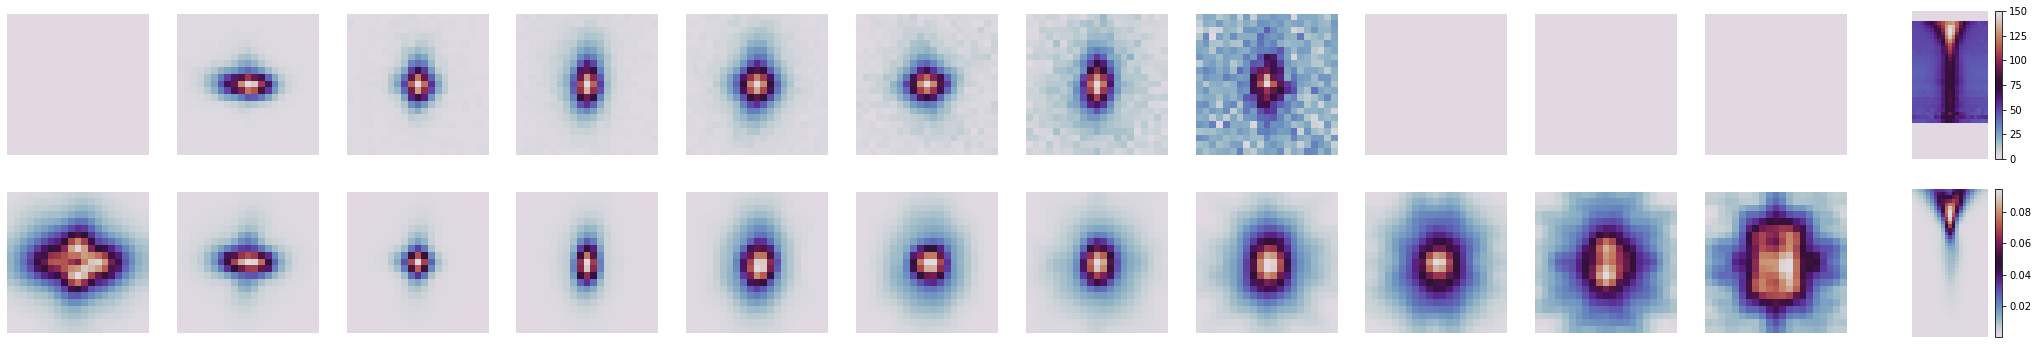

In [17]:
showpsfvsdata_insitu(f,p)

In [18]:
f.res.sigma

array([0.54999995, 0.54999995], dtype=float32)

##### Optional plots

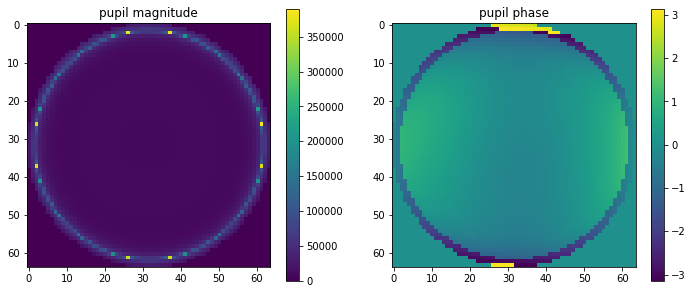

In [19]:
showpupil(f,p)

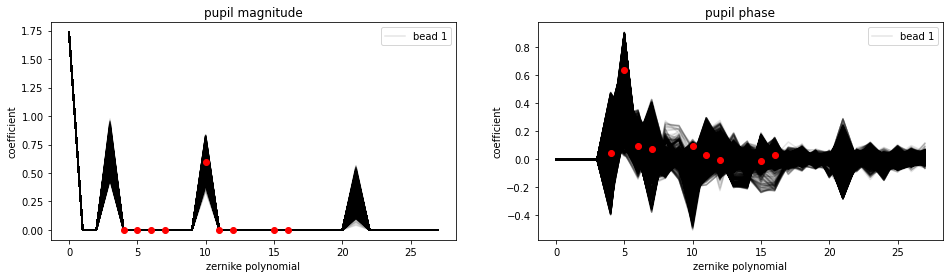

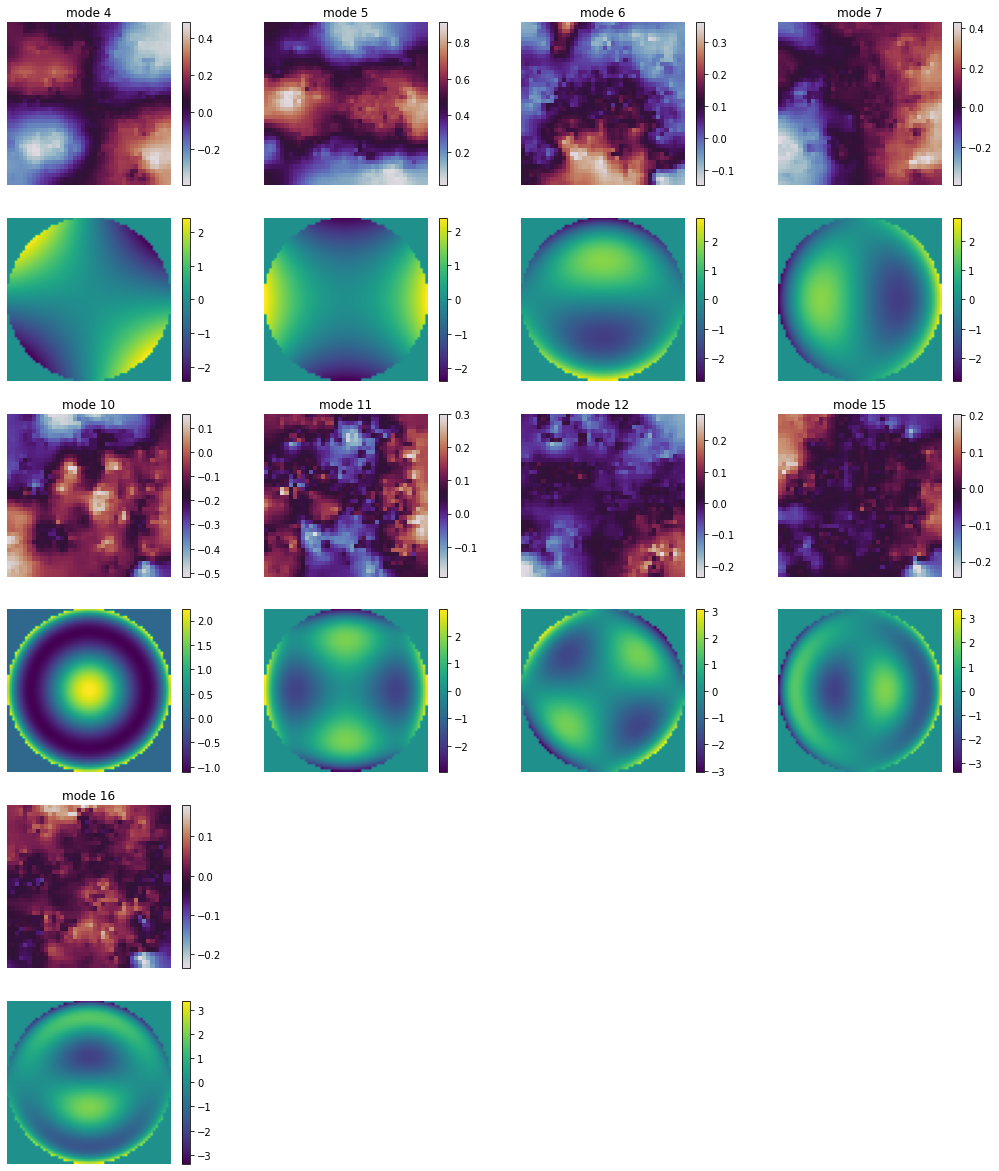

In [20]:
showzernikemap(f,p,index=[4,5,6,7,10,11,12,15,16])

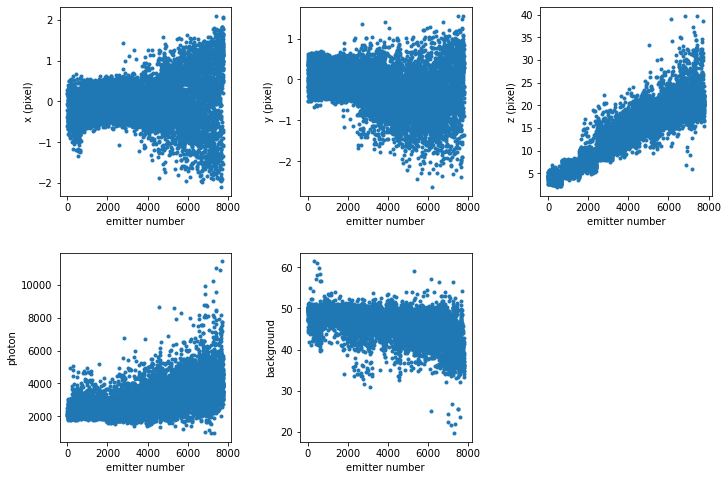

In [12]:
showlearnedparam_insitu(f,p)

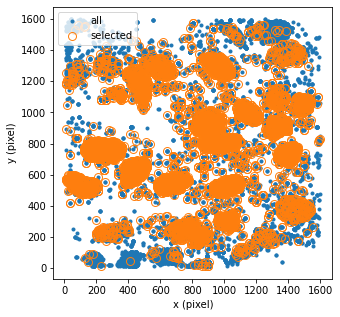

In [13]:
showcoord(f,p)